# Qiskit Optimization
Author: Atsushi Matsuo
IBM Quantum, IBM Research - Tokyo


#### Optimization problems

Search for an optimal solution in a finite or countably infinite set of potential solutions. These are important for making complex decisions and definition of strategies.

These optimization problems are usually built up based on a objective function that could be eather minimized or maximazed, Depending on the problem you're trying to solve. Some examples of objective functions are

* Minimization: Cost, distance, lenght of traversal, weight, processing time, material, energy consuption, number of objects.
    * E.g. Find the shortest path from A to B.
* Maximization: Profit, value, output, return, yield, utility, efficiency, capacity, number of objects.
    * E.g. Production Planning.

#### Qiskit Optimization
Qiskit offers the whole range of solving optimization problems using Qiskit optimization. Also has an option for representing problems with ising Hamiltonian in order to be optimized. Qiskit allows the users to solve problems using different algorithms such as QAOA, Grover adaptive search, classical solvers.

#### Quadratic programs

* Qiskit Optimization supports Quadratically Constrained Quadratic Programs.
    * Binary, integer and continuous variables.
    * Equality and inequality constraints.
        * minimize $x^TQ_0x + c^T x$
        * subject to:
            * $Ax \leq b$
            * $x^TQ_ix + a_i^T x \leq r_i, \hspace{1em} 1,...,i,...,n$
            * $l_i\leq x_i \leq u_i,\hspace{1em}1,...,i,...,n $
        
        where $Q_i$ are $n\times n$ matrices, A is a $m\times n$ matrix, x and c are $n-$dimensional vectors being $x$ the unknown variables to be optimized and $c$ are constants
* Simple example of quadratic program
    * maximize $2xy + x + y + z$
    * subject to:
        * $x+y+z \leq 2$
        * $x,y,z \in \{0,1\}$
* covers various types of problems such as traveling salesman problems (TSP), Max cut, Vertex Cover and so on.
* Qiskit introduces the `QuadraticProgram` class to make a  model of an optimization model.

### Modeling optimization problems
* Directly constructing a `QuadraticProgram`.
* Loading a `QuadraticProgram` from a classical optimization solvers (Docplex and Gurobipy).
* Loading a `QuadraticProgram` from an LP file.

Here is an example of constructing a `QuadraticProgram`

In [1]:
## Importing QuadraticProgram class
from qiskit_optimization import QuadraticProgram

## Define the QuadraticProgram
qp = QuadraticProgram()

## Add variables
qp.binary_var('x')
qp.binary_var('y')
qp.integer_var(lowerbound=0,upperbound=7,name='z')

## Add objective function
qp.maximize(linear={'x': 2, 'y':1, 'z': 1})

## Add constraint
qp.linear_constraint(linear={'x':1,'y':1,'z':1}, sense='LE', rhs=2, name='xyz_leq')

print(qp.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: CPLEX

Maximize
 obj: 2 x + y + z
Subject To
 xyz_leq: x + y + z <= 2

Bounds
 0 <= x <= 1
 0 <= y <= 1
       z <= 7

Binaries
 x y

Generals
 z
End



### Converting `QuadraticProgram` to an Ising Hamiltonian

* `QuadraticProgram` class is generic and powergul representation for optimization problems.
* However, quantum algorithms cannot handle `QuadraticProgram`, directly.
    * Need to convert the problem into Quadratic Unconstrained Binary Optimization (QUBO) problems, and eventually Ising Hamiltonians.
    * QUBO: QuadraticProgram, but not constraints
    * Ising Hamiltonian: $H = \sum_i w_i Z_i + \sum_{i<j} w_{ij}Z_iZ_j$ where $Z_i$ is the $Z$ pauli operator.
* Qiskit offers a variety of converters, and automatically converts problems yo Ising Hamiltonians.
    * Users do not need to bother with complicated conversion process.
    
### Minimum Eigen Optimizer
* Finding the solution of a QUBO is equivalent to finding the grond state of a correspongind Ising Hamiltonian.
* Qiskit offers a `MinimumEigenOptimizer` for that purpose.
* Can choose a variety of solving methods such as
    * QAOA
    * VQE
    * CplexSolver (classical exact method)

### Max-cut Problem using QAOA

* NP-complete problem, known as classically intractable problem.
* Applications in clustering, network science. statistical physics and so on.
* Formal definition of the problem is:
    * Consider $n-$node indirected graph $G = (V,E)$ where $|V| = n$ with edges weights $w_{ij} > 0, w_{ij} = w_{ji}, for(i,j)\in E$. $E$ refers to every edge and $V$ to the nodes.
    * Cut is defined as a partition of the original set $V$ into two subsets.
    * Objective function to be optimized is the sum of the weights of the edges connecting nodes in the two different subsets, *crossing* the cut.
    $$\text{maximize} \sum_{i,j} w_{ij}x_{i}(q-x_j) + \sum_{i}w_ix_i$$
    
    * No constraints.
    
### Example with 5 nodes
* Divide the graph into two sets.
* Maximize the number of edges connecting nodes in the two different subsets.
* In this example, this division divides the graph into two subsets and maximize de number of edgec in each set, 5.
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Max-cut.svg/1024px-Max-cut.svg.png' style="width:300px;height:auto;">

    Now we can use the application class for Max-cut problem to create a `QuadraticProgram`

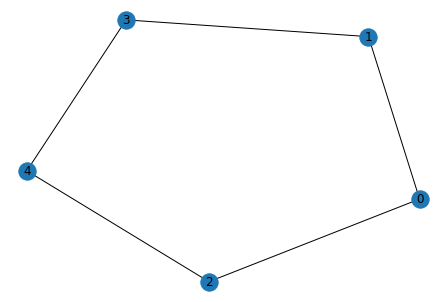

In [9]:
import networkx as nx

## Make a graph with degree = 2 and number of nodes=5
graph = nx.random_regular_graph(d=2, n=5, seed=111)
pos = nx.spring_layout(graph, seed=111)

## Application class for a Max-cut problem
## Make a Max-cut problem from the graph
from qiskit_optimization.applications import Maxcut
maxcut = Maxcut(graph)
maxcut.draw(pos = pos)

In [10]:
## Make a QuadraticProgram by calling to_quadratic_program()
qp = maxcut.to_quadratic_program()

print(qp)

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: Max-cut

Maximize
 obj: 2 x_0 + 2 x_1 + 2 x_2 + 2 x_3 + 2 x_4 + [ - 4 x_0*x_1 - 4 x_0*x_2
      - 4 x_1*x_3 - 4 x_2*x_4 - 4 x_3*x_4 ]/2
Subject To

Bounds
 0 <= x_0 <= 1
 0 <= x_1 <= 1
 0 <= x_2 <= 1
 0 <= x_3 <= 1
 0 <= x_4 <= 1

Binaries
 x_0 x_1 x_2 x_3 x_4
End



### Solving with QAOA

result:
 optimal function value: 4.0
optimal value: [0. 1. 1. 0. 0.]
status: SUCCESS

 solution:
 [[0, 3, 4], [1, 2]]

time:  0.03774619102478027


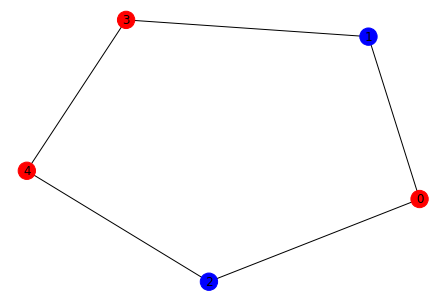

In [11]:
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms import QAOA, NumPyMinimumEigensolver

qins = QuantumInstance(backend=Aer.get_backend('qasm_simulator'), shots=1000, seed_simulator=123)

#define QAOA solver
meo = MinimumEigenOptimizer(min_eigen_solver=QAOA(reps=1, quantum_instance=qins))
result = meo.solve(qp)

print('result:\n', result)
print('\n solution:\n', maxcut.interpret(result))
print('\ntime: ',result.min_eigen_solver_result.optimizer_time)

maxcut.draw(result, pos=pos)

result:
 optimal function value: 4.0
optimal value: [0. 1. 1. 1. 0.]
status: SUCCESS

 solution:
 [[0, 4], [1, 2, 3]]


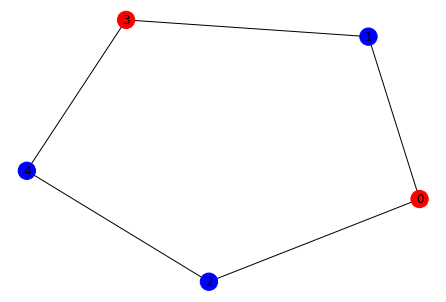

In [12]:
## Numpy Eigensolver

meo = MinimumEigenOptimizer(min_eigen_solver=NumPyMinimumEigensolver())
result = meo.solve(qp)
print('result:\n', result)
print('\n solution:\n', maxcut.interpret(result))

maxcut.draw(result,pos=pos)

It can be seen that the solutions obtained using QAOA and a classical optimizer are equivalent.

# Introduction to Qiskit Machine Learning
Author: Anton Dekusar
IBM Quantum, IBM Research Europe - Dublin


### Classification problem

Supervised binary classification

* Train set $T$, which is a set that is alreaty classified.
* Class map: $c_T\rightarrow \{+1,-1\}$, this means, the elements in $T$ are classified in either $+1$ od $-1$.
* Test set S. The classification map por S elements is unknown.

The goal is find a class map $\tilde{c}:T\cup S\rightarrow  \{+1,-1\}$

## Support Vector Machine

Linear decision function
$$\tilde{c}_{SVM}(\mathbf{x}) = sign(\mathbf{w}^T\mathbf{x} - b)$$
This means, the define a plane in space and the elements in one side of that plane are labeled with $+1$ and the others with $-1$

This only works for linearly separable data

The objective here is to maximize the separation between 2 classes.

### Kernelized SVM

Introduce a nonlinear feature transformation

$$\phi : \mathbb{R}^s \rightarrow \mathcal{V}, \text{where }\mathcal{V} \text{ a Hilbert space}$$
$$\tilde{c}_{SVM}(\mathbf{x}) = sing(\langle\mathbf{w},\phi(\mathbf{x})\rangle_\mathcal{V} -b)$$

Lenear in the feature space, but nonlinear in the original space.
Kernetl trick is to rewrite the SVM problem to only explicity  depend on kernel values
$$k(\mathbf{x},\mathbf{x}') = \langle\phi(\mathbf{x}),\phi(\mathbf{x}')\rangle_{\mathcal{V}}$$

Not the feature vectors $\phi(\mathbf{x})$

#### Example
Original data
$$\mathbf{x}\in\mathbb{R}^2$$
Feature map 
$$\phi(\mathbf{x}) = (x_1,x_2,x_1^2+x_2^2)\in\mathbb{R}^3$$
kernel
$$k(\mathbf{x},\mathbf{x}') = \phi(\mathbf{x})\cdot\phi(\mathbf{x}') = \mathbf{x}\cdot\mathbf{x}' + ||\mathbf{x}||^2||\mathbf{x}'||^2$$

## Quantum Support Vector Machine

Here the feature map is defined as a quantum circuit $\mathcal{E}(\mathbf{x})$

$$\psi : \mathbb{R}^s\rightarrow \mathcal{S}(2^q)$$
$$\mathbf{x}\rightarrow  |\psi(\mathbf{x})\rangle\langle \psi(\mathbf{x})|$$

Quantum kernel as a Hilbert-Schmidt inner product:
$$k(\mathbf{x},\mathbf{x}') = |\langle \psi(\mathbf{x}')|\psi(\mathbf{x})\rangle|^2$$
$$= |\langle 0|\mathcal{E}(\mathbf{x}')^\dagger \mathcal{E}(\mathbf{x})  |0\rangle|^2$$

## Quantum kernel Demo

### Classification example
Qiskit Machine Learning provide some datasets. We choose a dataset of dimension 2 `adhoc_dimensions = 2`


In [7]:
from qiskit_machine_learning.datasets import ad_hoc_data
import matplotlib.pyplot as plt
import numpy as np

from qiskit.utils import algorithm_globals

seed = 12345
algorithm_globals.random_seed = seed

adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=20,
    test_size=5,
    n = adhoc_dimension,
    gap=0.3,
    plot_data=False, one_hot=False, include_sample_total=True
)

## define a helpful function

def plot_adhoc_dataset(train_features, train_labels, test_features, test_labels, adhoc_total):
    plt.figure(figsize=(8, 8))
    plt.ylim(0, 2 * np.pi)
    plt.xlim(0, 2 * np.pi)
    plt.imshow(np.asmatrix(adhoc_total).T, interpolation='nearest',
               origin='lower', cmap='RdBu', extent=[0, 2 * np.pi, 0, 2 * np.pi])

    plt.scatter(train_features[np.where(train_labels[:] == 0), 0], train_features[np.where(train_labels[:] == 0), 1],
                marker='s', facecolors='w', edgecolors='b', label="A train")
    plt.scatter(train_features[np.where(train_labels[:] == 1), 0], train_features[np.where(train_labels[:] == 1), 1],
                marker='o', facecolors='w', edgecolors='r', label="B train")
    plt.scatter(test_features[np.where(test_labels[:] == 0), 0], test_features[np.where(test_labels[:] == 0), 1],
                marker='s', facecolors='b', edgecolors='w', label="A test")
    plt.scatter(test_features[np.where(test_labels[:] == 1), 0], test_features[np.where(test_labels[:] == 1), 1],
                marker='o', facecolors='r', edgecolors='w', label="B test")

    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title("Ad hoc dataset for classification")

    plt.show()

Now we plot the data set. Blue areas refer to dogs and red areas represent cats.

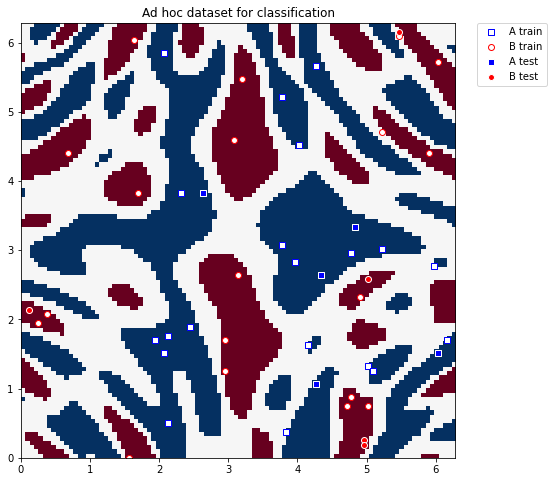

In [8]:
plot_adhoc_dataset(train_features, train_labels, test_features, test_labels, adhoc_total)

With the train and test sets, we have to set up the `QuantumKernel` class to calculate a kernel matrix using the `ZFeatureMap`, and the `Aer` `qasm_simulator` using 1024 shots.

In [9]:
from qiskit import Aer
from qiskit.utils import QuantumInstance

quantum_instance = QuantumInstance(Aer.get_backend('qasm_simulator'),shots=1024,
                                  seed_simulator=seed, seed_transpiler=seed)

In [10]:
from qiskit.circuit.library import ZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel

z_feature_map = ZFeatureMap(feature_dimension=adhoc_dimension,reps=2)
z_kernel = QuantumKernel(feature_map=z_feature_map, quantum_instance=quantum_instance)

The feature map is impornat for getting good classification results. yo can decompose the map and take a look of it.

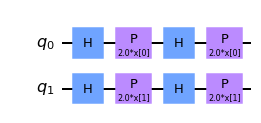

In [13]:
z_feature_map.decompose().draw('mpl')

Note that there ir not entanglement between the qubits, this means that the maping of this data can be easily represented classically.

### SVC algorithm

The `scikit-learn` `SVC` algorithm is used for classification of data. It allows us to define a custom kernel in two different ways:
* By providing the kernel as a callable function.
* By precomputing the kernel matrix.

Either of this can be done using the `QuantumKernel` class in Qiskit Machine Learning.

In [16]:
from sklearn.svm  import SVC

## Here the kernel is a callable function
svc = SVC(kernel=z_kernel.evaluate)
svc.fit(train_features,train_labels)
score = svc.score(test_features,test_labels)

print(f'Callable kernel with ZFeatureMap classification test score: {score}')

Callable kernel with ZFeatureMap classification test score: 0.6


The classification algorithm just has 60% of accuracy. We can pick another feature map.

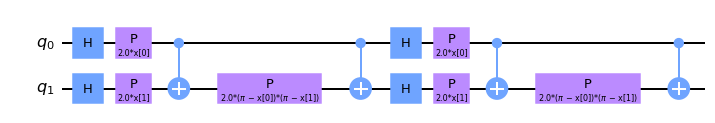

In [22]:
from qiskit.circuit.library import ZZFeatureMap

zz_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2,entanglement='linear')
zz_kernel = QuantumKernel(feature_map=zz_feature_map,quantum_instance=quantum_instance)

zz_feature_map.decompose().draw('mpl')

Note that this feature map is not linear, since there are phase rotations that imply both parameters. Besides that, this feature map entangles the 2 qubits, since there are CNOT gates.

Let's see the performance of this feature map

In [23]:
from sklearn.svm  import SVC

## Here the kernel is a callable function
svc = SVC(kernel=zz_kernel.evaluate)
svc.fit(train_features,train_labels)
score = svc.score(test_features,test_labels)

print(f'Callable kernel with ZZFeatureMap classification test score: {score}')

Callable kernel with ZZFeatureMap classification test score: 1.0


As you can see, the score has improved a lot, showing how this feature map is better.

### QSVC

Qiskit Machine Learning can also provide the `QSVC` class that extends the `scikit-learn` `SVC` class.

In [24]:
from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC()
qsvc.quantum_kernel.quantum_instance = quantum_instance

qsvc.fit(train_features,train_labels)
qsvc_score = qsvc.score(test_features,test_labels)

print(f'QSVC classification test score: {qsvc_score}')

QSVC classification test score: 1.0


You can get predicter values by calling the `predict` method


In [25]:
qsvc.predict(test_features)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])